In [1]:
import sys
import site
sys.path.insert(0, site.getusersitepackages())

In [2]:
import numpy as np
import uproot
import awkward as ak
import collections
import matplotlib
import matplotlib.pyplot as plt
import glob
import scipy.stats as stats
# import ipywidgets as widgets
# %matplotlib widget

# Wider Cells
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [3]:
plt.tight_layout()
matplotlib.rcParams['figure.figsize'] = (12, 8)
font = {'size'   : 22}
matplotlib.rc('font', **font)
plt.rcParams["legend.markerscale"] = 3

<Figure size 432x288 with 0 Axes>

In [4]:
runs = [505,508,509,510,521,522]

In [8]:
run = 514
files = glob.glob(f"/eos/experiment/wcte/data/readout_commissioning/offline/dataR{run}S*P*.root")
len(files)

49

In [6]:
tree = uproot.open(files[0]+":WCTEReadoutWindows")
max_event_number = ak.max(tree['event_number'].array())
max_card_number = 131

In [7]:
event_number        = tree['event_number'].array()
window_time         = tree['window_time'].array()
hit_mpmt_card_ids   = tree['hit_mpmt_card_ids'].array()
#hit_pmt_channel_ids = tree['hit_pmt_channel_ids'].array()
hit_pmt_times       = tree['hit_pmt_times'].array()

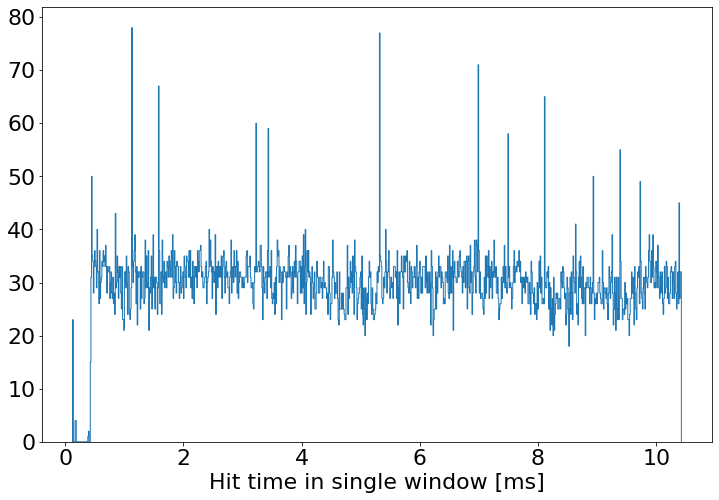

In [8]:
plt.hist(hit_pmt_times[0]/1e6, bins=1000, histtype='step')

plt.xlabel("Hit time in single window [ms]");

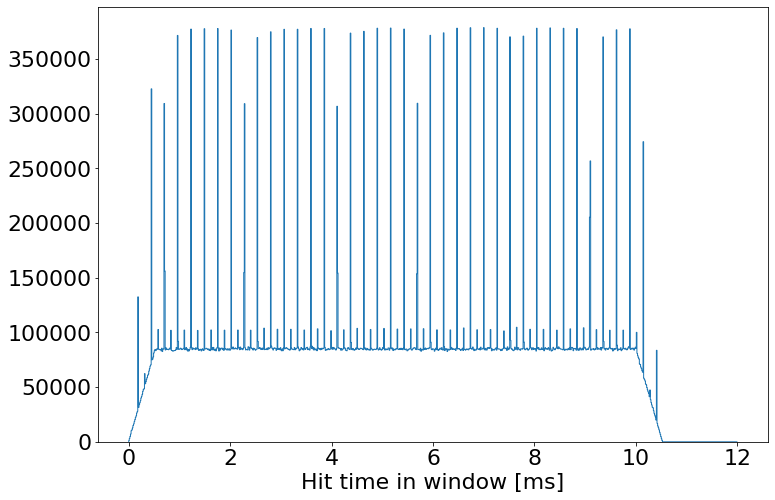

In [9]:
plt.hist(ak.flatten(hit_pmt_times)/1e6, bins=1000, range=(0,12), histtype='step')
plt.xlabel("Hit time in window [ms]");

In [9]:
window_time

<Array [1.05e+07, 1.1e+07, ..., 2.25e+15, 2.25e+15] type='56820 * float64'>

In [10]:
hit_pmt_times

<Array [[4.46e+05, 4.46e+05, ..., 1.04e+07], ...] type='56820 * var * float64'>

In [10]:
zeros = ak.zeros_like(hit_mpmt_card_ids)

In [13]:
event_number + zeros

<Array [[0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0], ...] type='56820 * var * int32'>

In [14]:
#times       = ak.flatten(window_time[:max_event_number-65]+hit_pmt_times[:max_event_number-65]).to_numpy()
events      = ak.flatten(event_number + zeros).to_numpy()
card_ids    = ak.flatten(hit_mpmt_card_ids).to_numpy()
#channel_ids = ak.flatten(hit_pmt_channel_ids[:max_event_number-65]).to_numpy()

In [15]:
events.shape

(82602336,)

In [16]:
card_ids.shape

(82602336,)

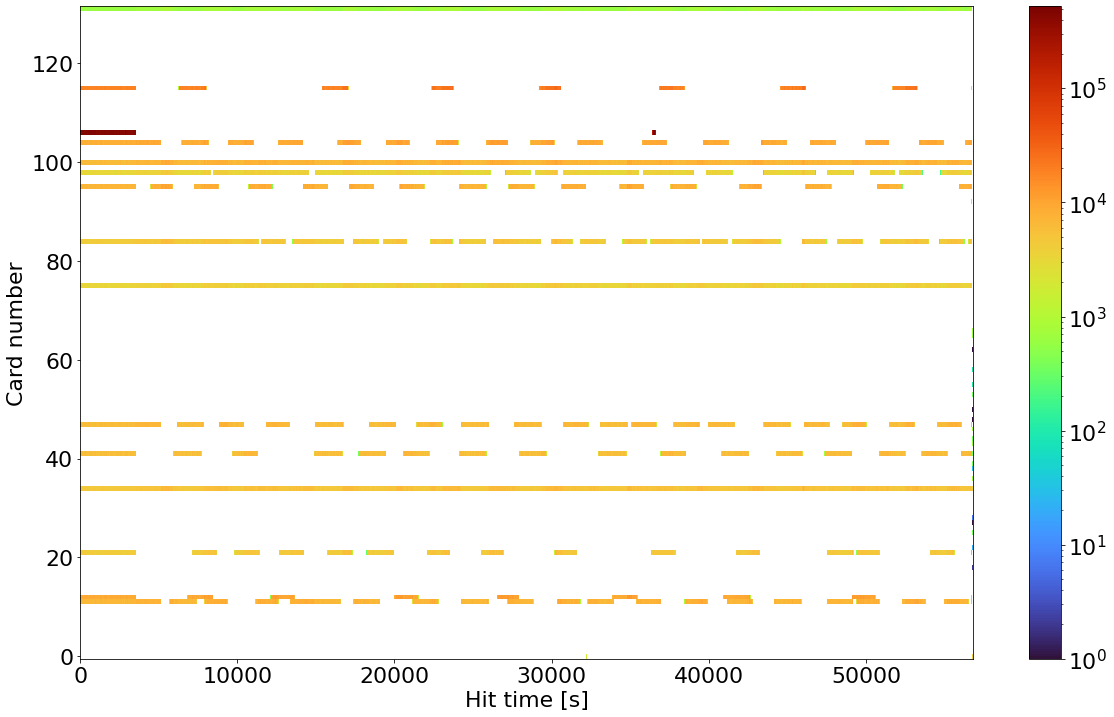

In [17]:
fig, ax = plt.subplots(figsize=(20,12))

h = ax.hist2d(events, card_ids, bins=(1000,np.arange(133)-0.5), norm='log', cmap='turbo')

ax.set_xlabel("Hit time [s]")
ax.set_ylabel("Card number")

fig.colorbar(h[3], ax=ax);

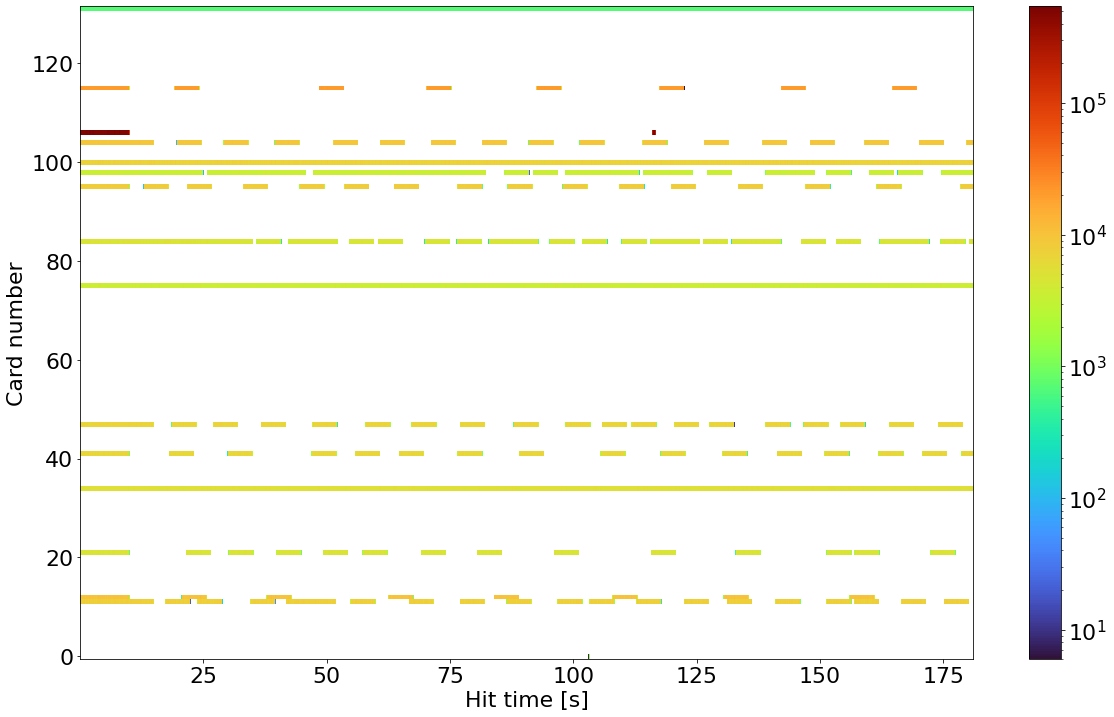

In [13]:
fig, ax = plt.subplots(figsize=(20,12))

h = ax.hist2d(times/1e9, card_ids, bins=(1000,np.arange(133)-0.5), norm='log', cmap='turbo')

ax.set_xlabel("Hit time [s]")
ax.set_ylabel("Card number")

fig.colorbar(h[3], ax=ax);

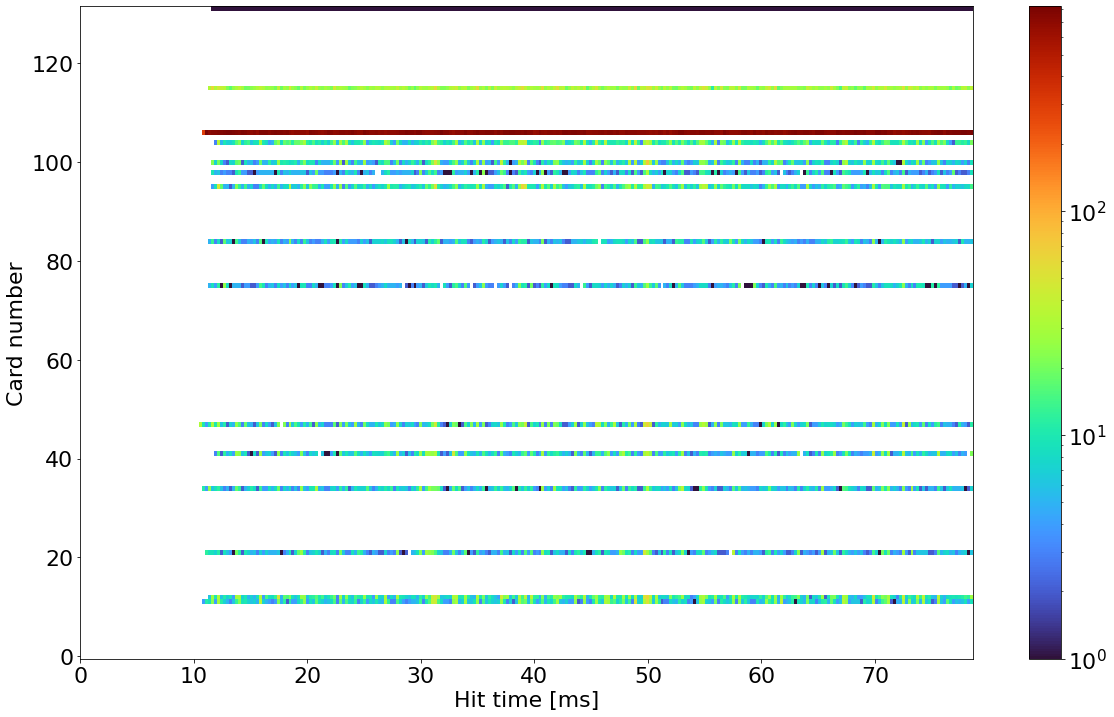

In [14]:
fig, ax = plt.subplots(figsize=(20,12))
h       = ax.hist2d(times/1e6, card_ids, bins=(np.arange(301)*262144/1e6,np.arange(133)-0.5), norm='log', cmap='turbo')

ax.set_xlabel("Hit time [ms]")
ax.set_ylabel("Card number")

fig.colorbar(h[3], ax=ax)

Text(0, 0.5, 'Trigger rate [kHz]')

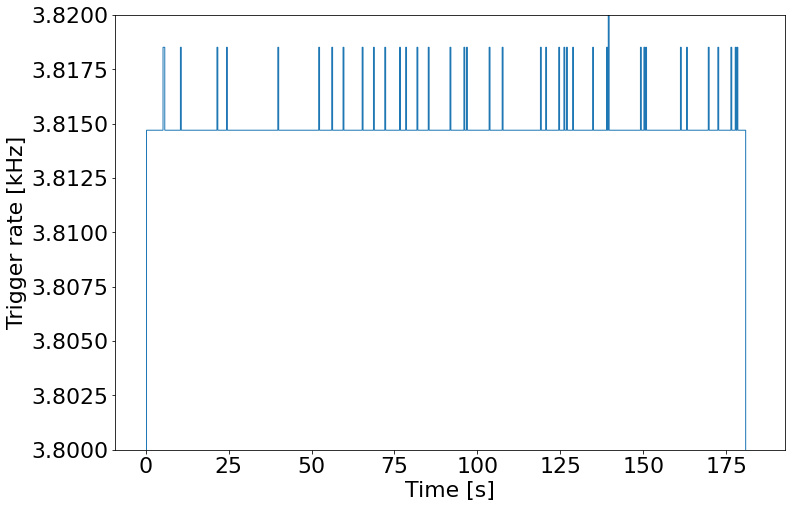

In [43]:
plt.hist(times[(card_ids==131)&(channel_ids==5)]/1e9, bins=np.arange(701)/1e9*262144*1000, weights=np.repeat(1000/262144, np.count_nonzero((card_ids==131)&(channel_ids==5))), histtype='step')
plt.xlabel("Time [s]")
plt.ylim((3.8,3.82))
plt.ylabel("Trigger rate [kHz]")

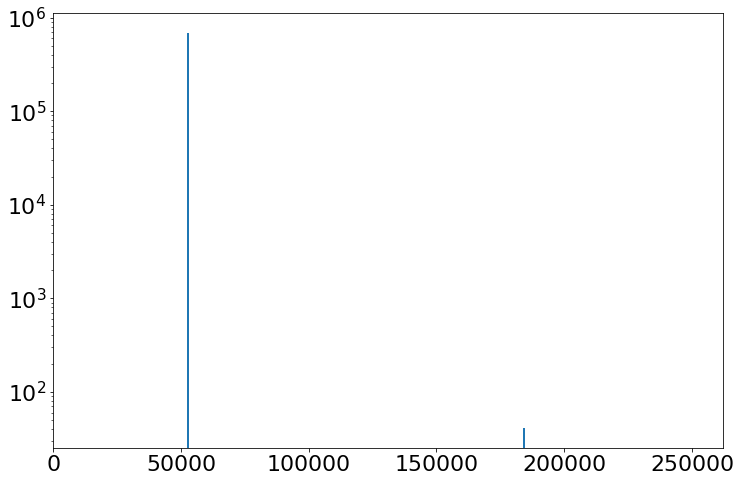

In [44]:
plt.hist(times[(card_ids==131)&(channel_ids==5)]%262144, bins=200)
plt.xlim(0,262144)
plt.yscale('log')

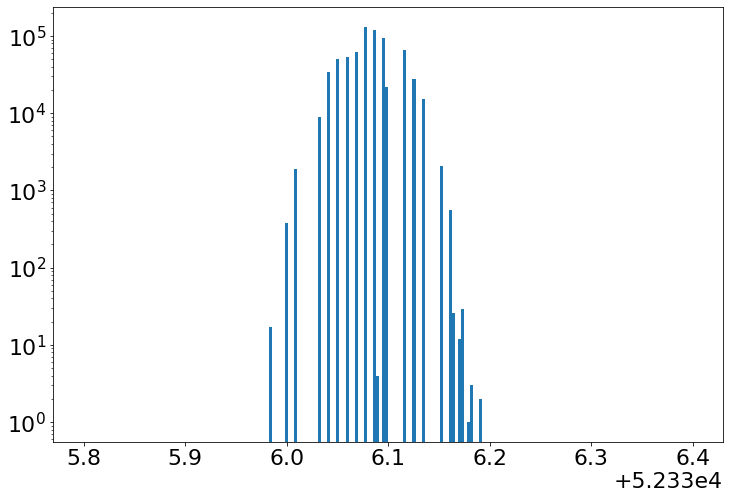

In [45]:
plt.hist(times[(card_ids==131)&(channel_ids==5)]%262144, bins=200, range=(52335.8,52336.4))
plt.yscale('log')

Text(0.5, 0, 'Time between trigger pulses [ns]')

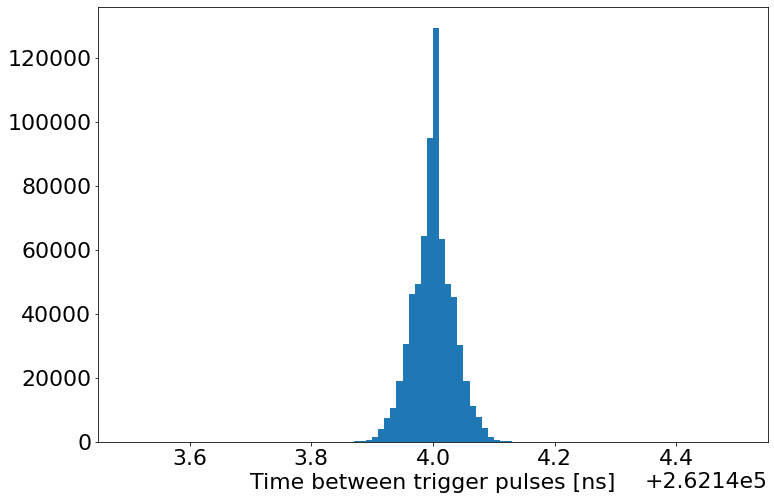

In [24]:
plt.hist(np.diff(np.sort(times[(card_ids==131)&(channel_ids==5)])), bins=100, range=(262143.5,262144.5))
plt.xlabel("Time between trigger pulses [ns]")

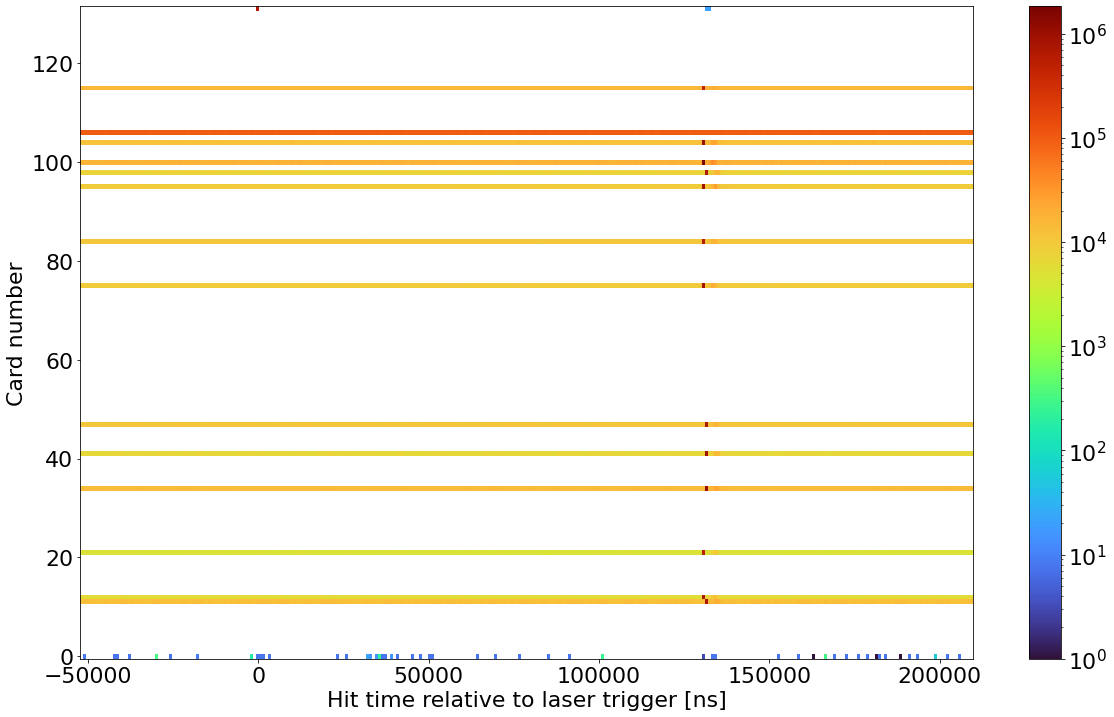

In [33]:
fig, ax = plt.subplots(figsize=(20,12))
h = ax.hist2d(times%262144-52336, card_ids, bins=(300,np.arange(133)-0.5), norm='log', cmap='turbo')
ax.set_xlabel("Hit time relative to laser trigger [ns]")
ax.set_ylabel("Card number")
fig.colorbar(h[3], ax=ax)

In [48]:
good_cards=[11, 12, 21, 34, 41, 47, 75, 84, 95, 98, 100, 104, 115]

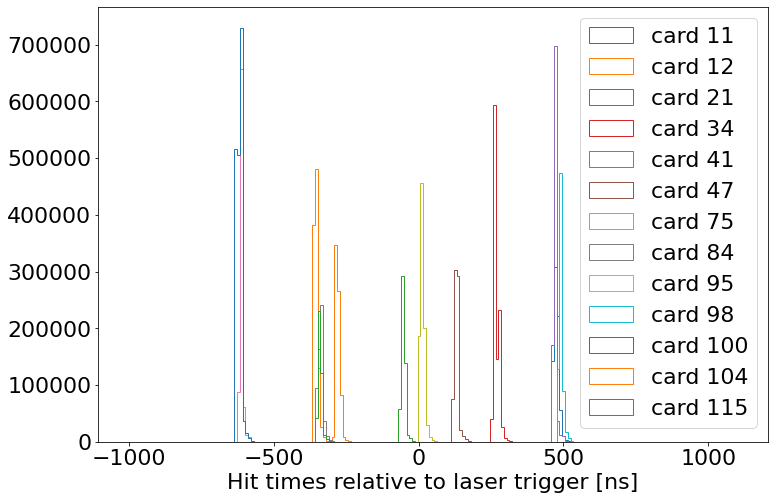

In [49]:
for c in good_cards:
        plt.hist(times[(card_ids==c)]%262144-52336-262144/2, bins=np.linspace(-1000,1100,220), histtype='step', label=f"card {c}")
plt.xlabel("Hit times relative to laser trigger [ns]")
plt.legend()
#plt.hist(times[(card_ids==21)&(channel_ids==1)]%262144-52336-262144/2, bins=np.linspace(-1000,1000,200), histtype='step', label="21/1")
#plt.yscale('log')

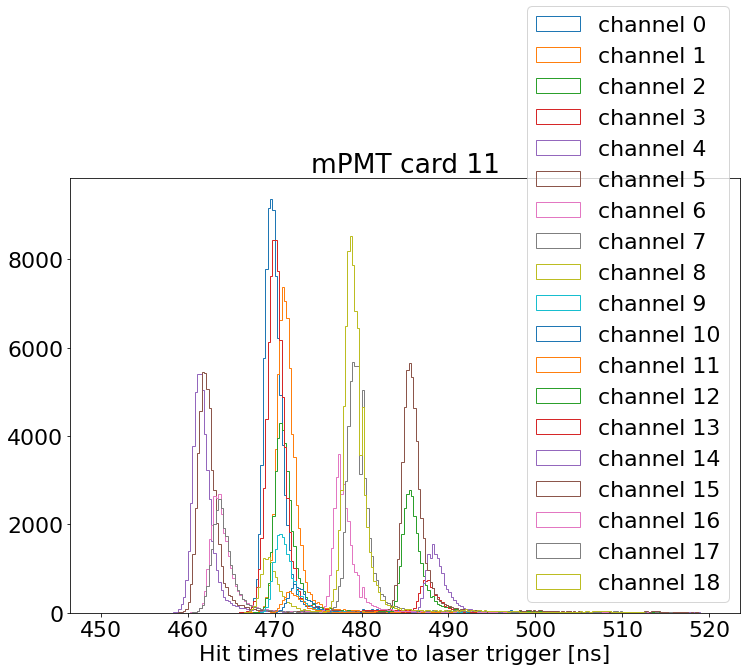

In [37]:
for c in range(19):
        plt.hist(times[(card_ids==11)&(channel_ids==c)]%262144-52336-262144/2, bins=np.linspace(450,520,260), histtype='step', label=f"channel {c}")
plt.title("mPMT card 11")
plt.xlabel("Hit times relative to laser trigger [ns]")
plt.legend()
#plt.hist(times[(card_ids==21)&(channel_ids==1)]%262144-52336-262144/2, bins=np.linspace(-1000,1000,200), histtype='step', label="21/1")
#plt.yscale('log')

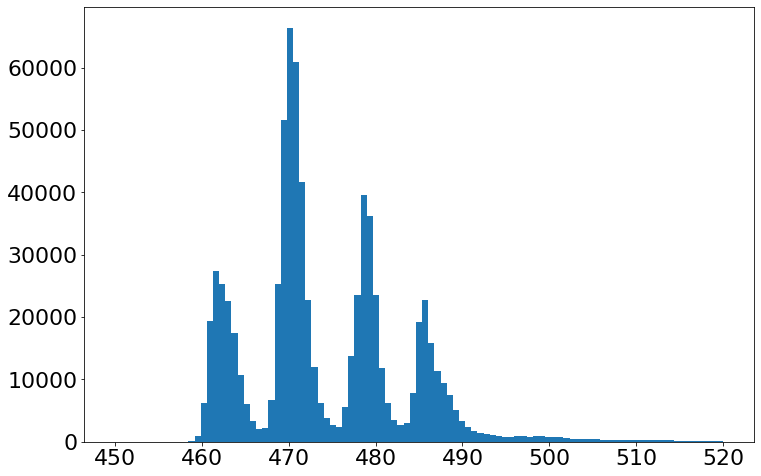

In [50]:
plt.hist(times[(card_ids==11)]%262144-52336-262144/2, bins=np.linspace(450,520,100))
plt.show()

Text(0.5, 0, 'Hit times relative to laser trigger [ns]')

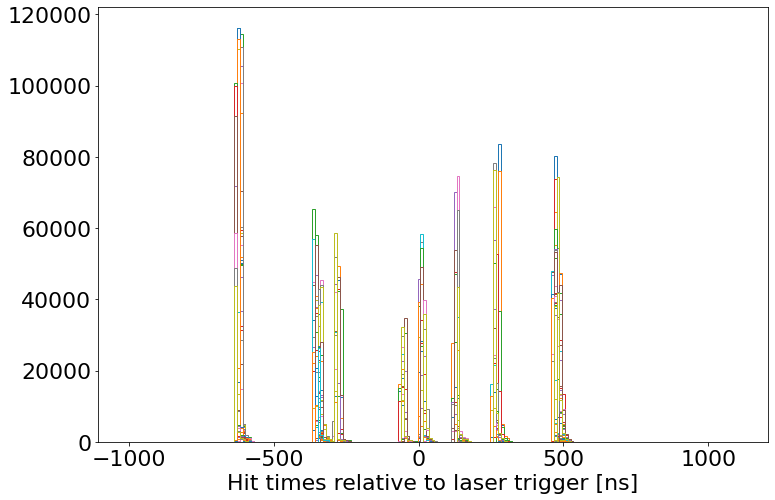

In [51]:
for c in good_cards:
    for ch in range(20):
        plt.hist(times[(card_ids==c)&(channel_ids==ch)]%262144-52336-262144/2, bins=np.linspace(-1000,1100,220), histtype='step', label=f"{c}/{ch}")
plt.xlabel("Hit times relative to laser trigger [ns]")
#plt.legend()
#plt.hist(times[(card_ids==21)&(channel_ids==1)]%262144-52336-262144/2, bins=np.linspace(-1000,1000,200), histtype='step', label="21/1")
#plt.yscale('log')

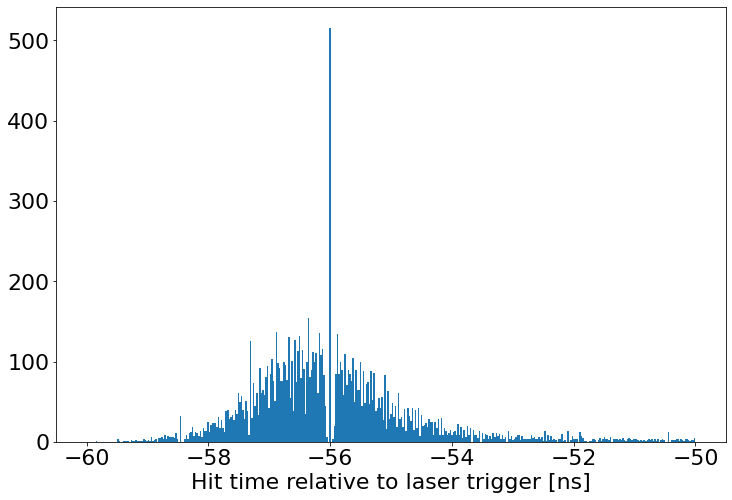

In [40]:
plt.hist(times[(card_ids==21)&(channel_ids==10)]%262144-52336-262144/2, bins=np.linspace(-60,-50,400))
plt.xlabel("Hit time relative to laser trigger [ns]")
plt.show()

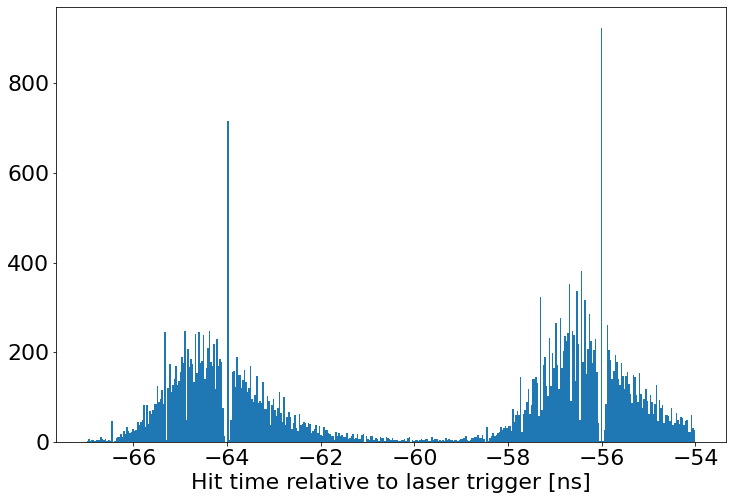

In [41]:
plt.hist(times[(card_ids==21)&(channel_ids==0)]%262144-52336-262144/2, bins=np.linspace(-67,-54,400))
plt.xlabel("Hit time relative to laser trigger [ns]")
plt.show()

/tmp/ipykernel_3885/494482067.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mode = stats.mode(np.rint(this_pmt_times))[0]


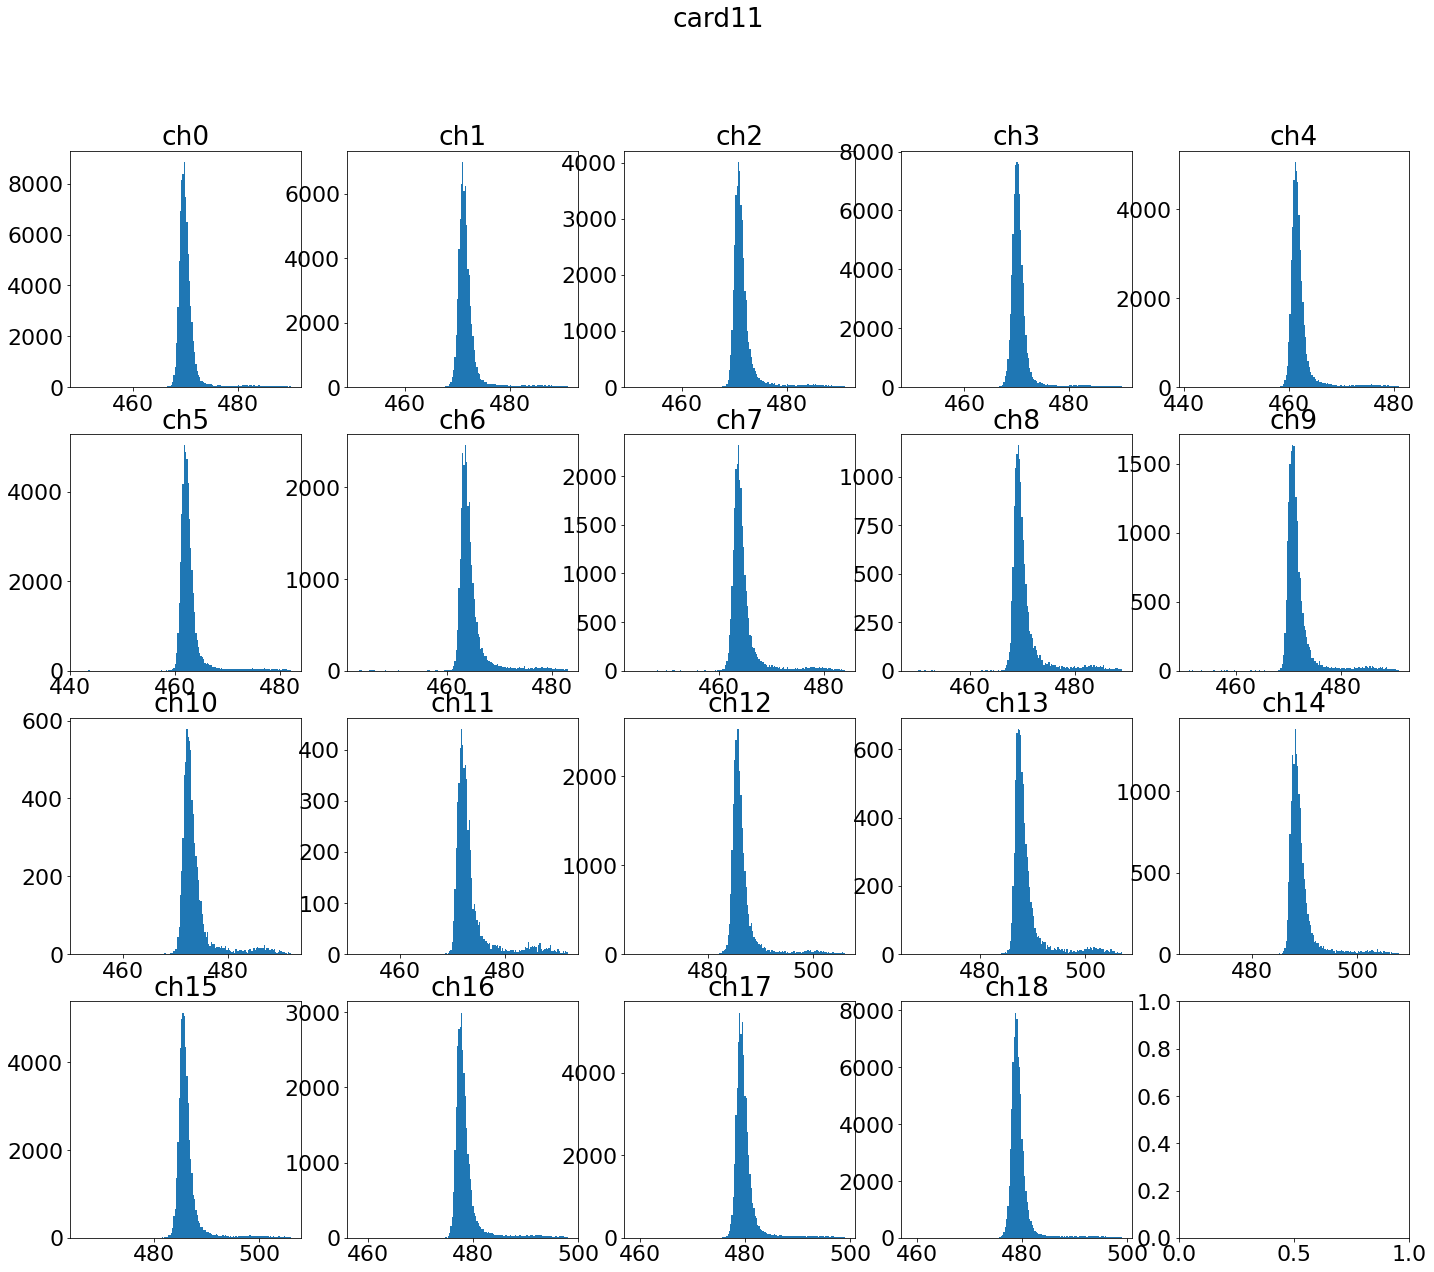

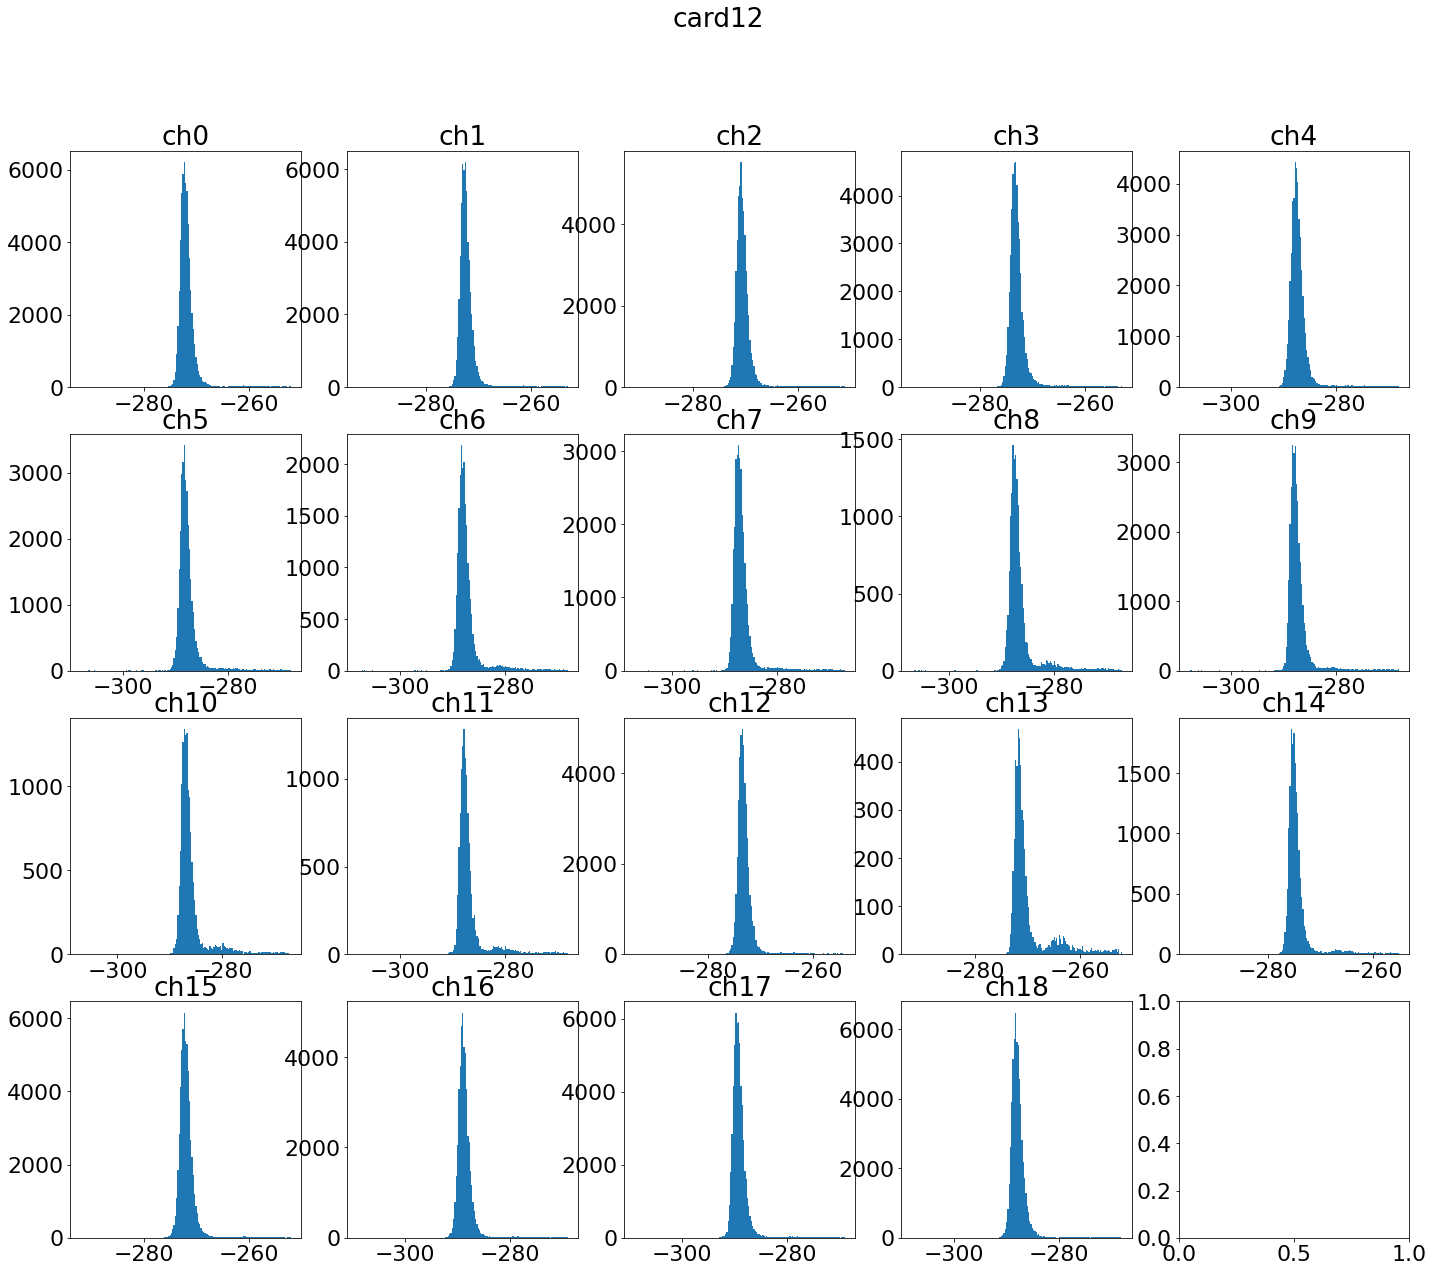

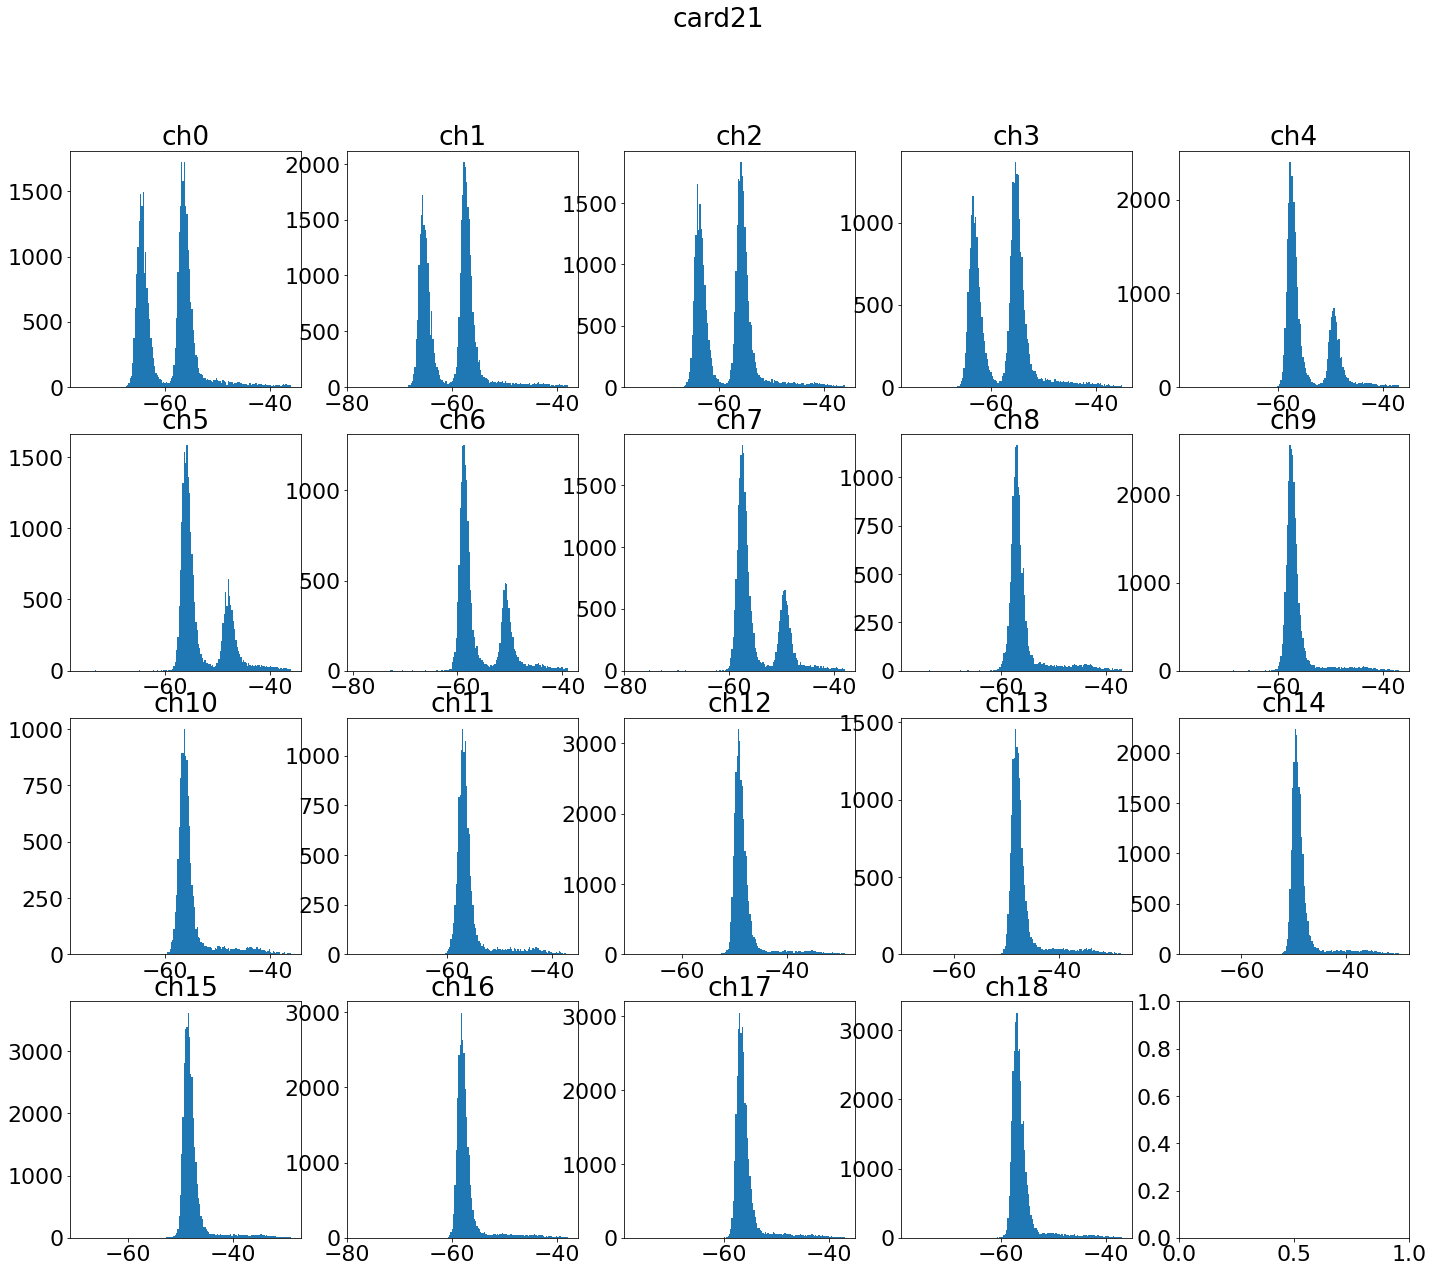

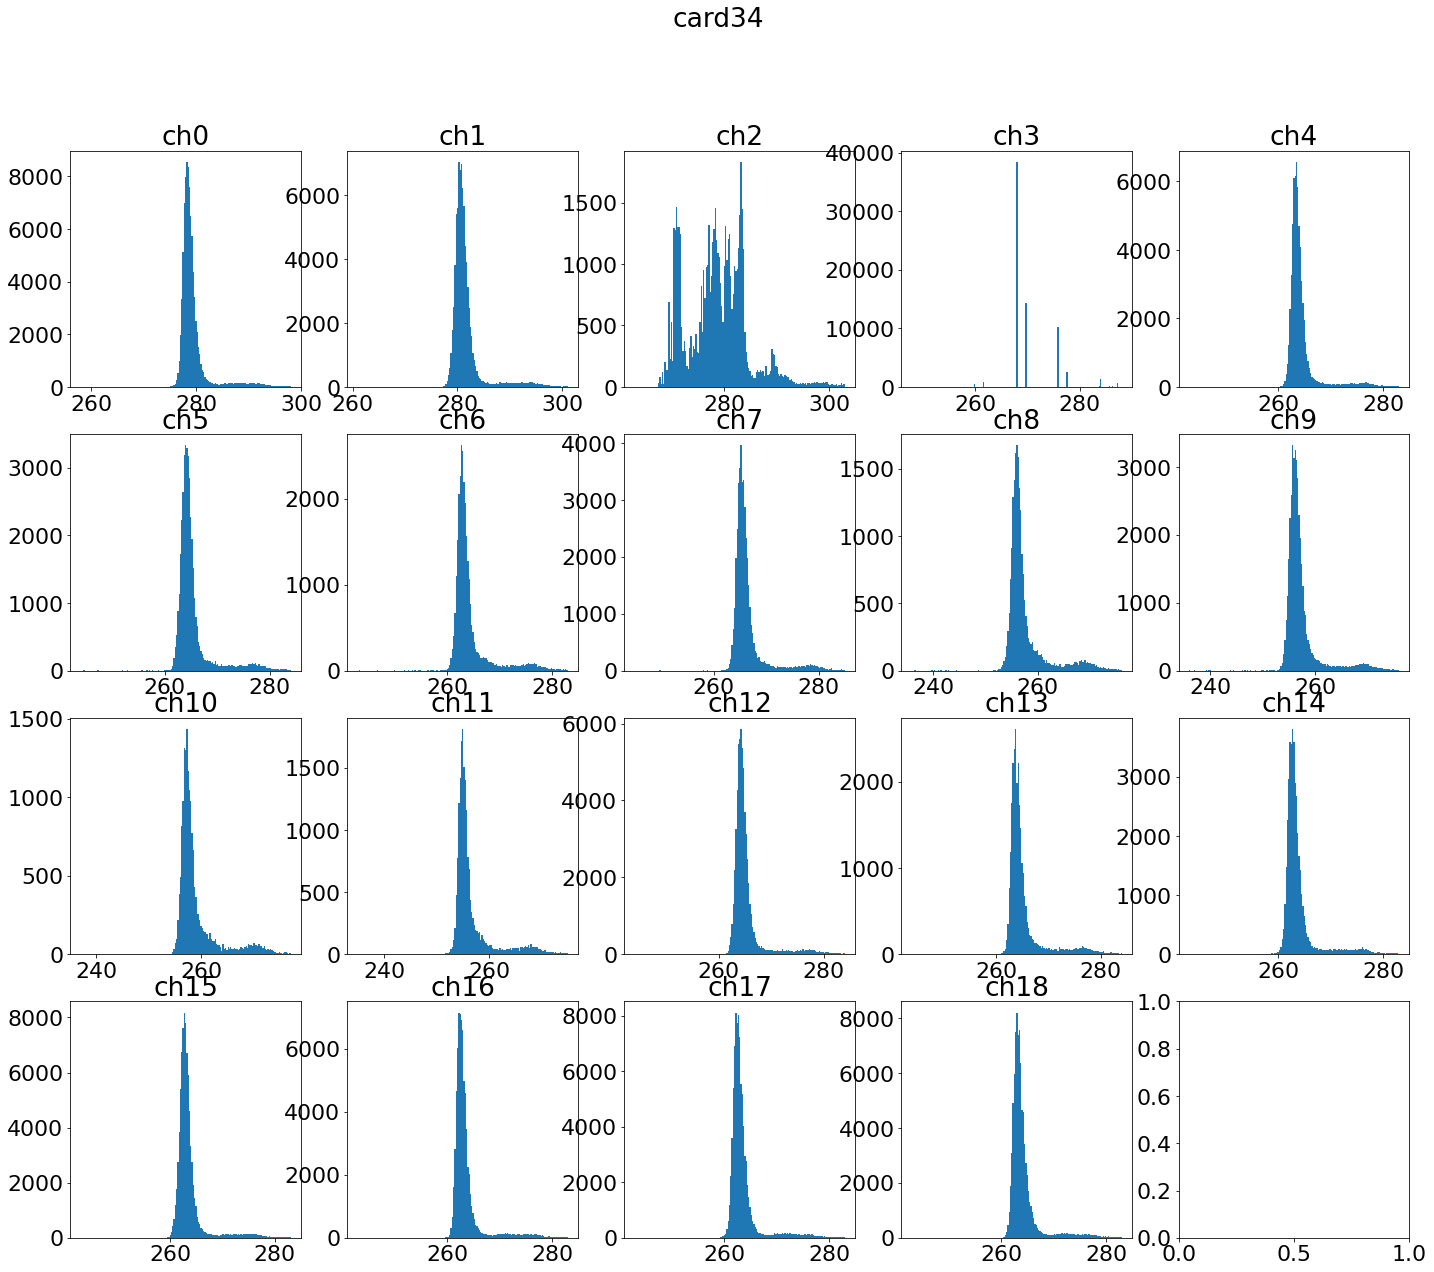

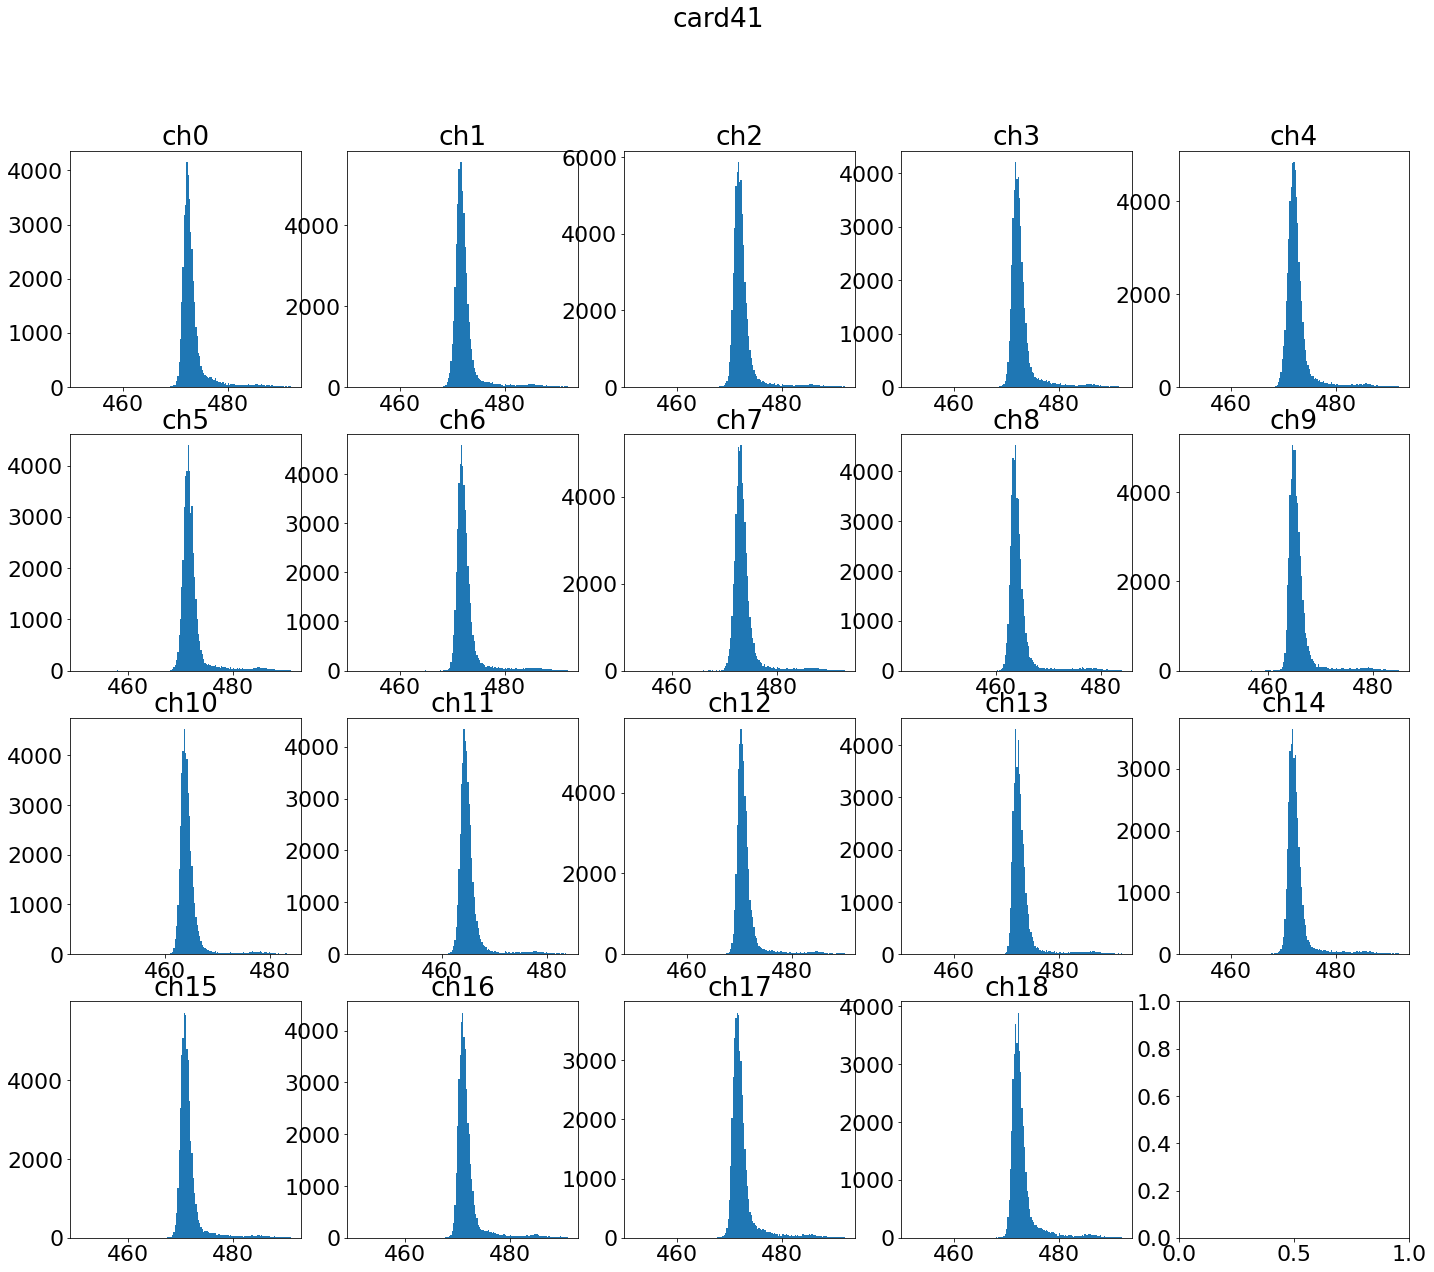

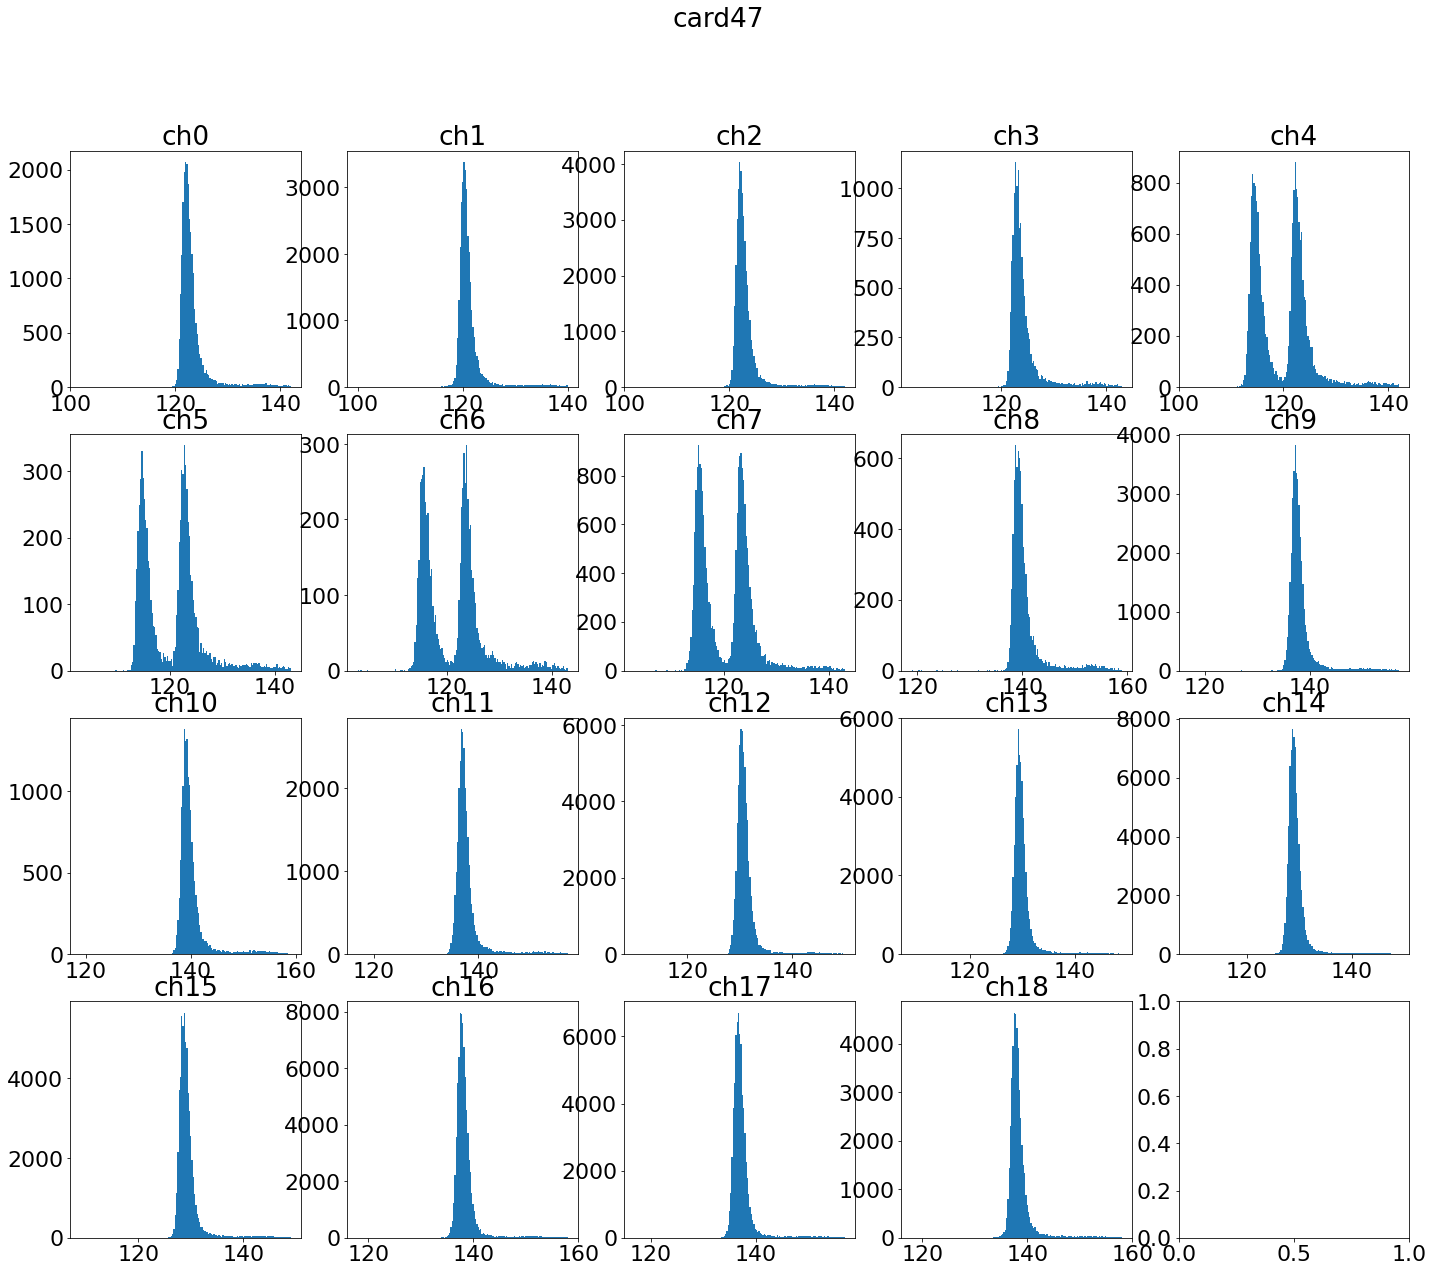

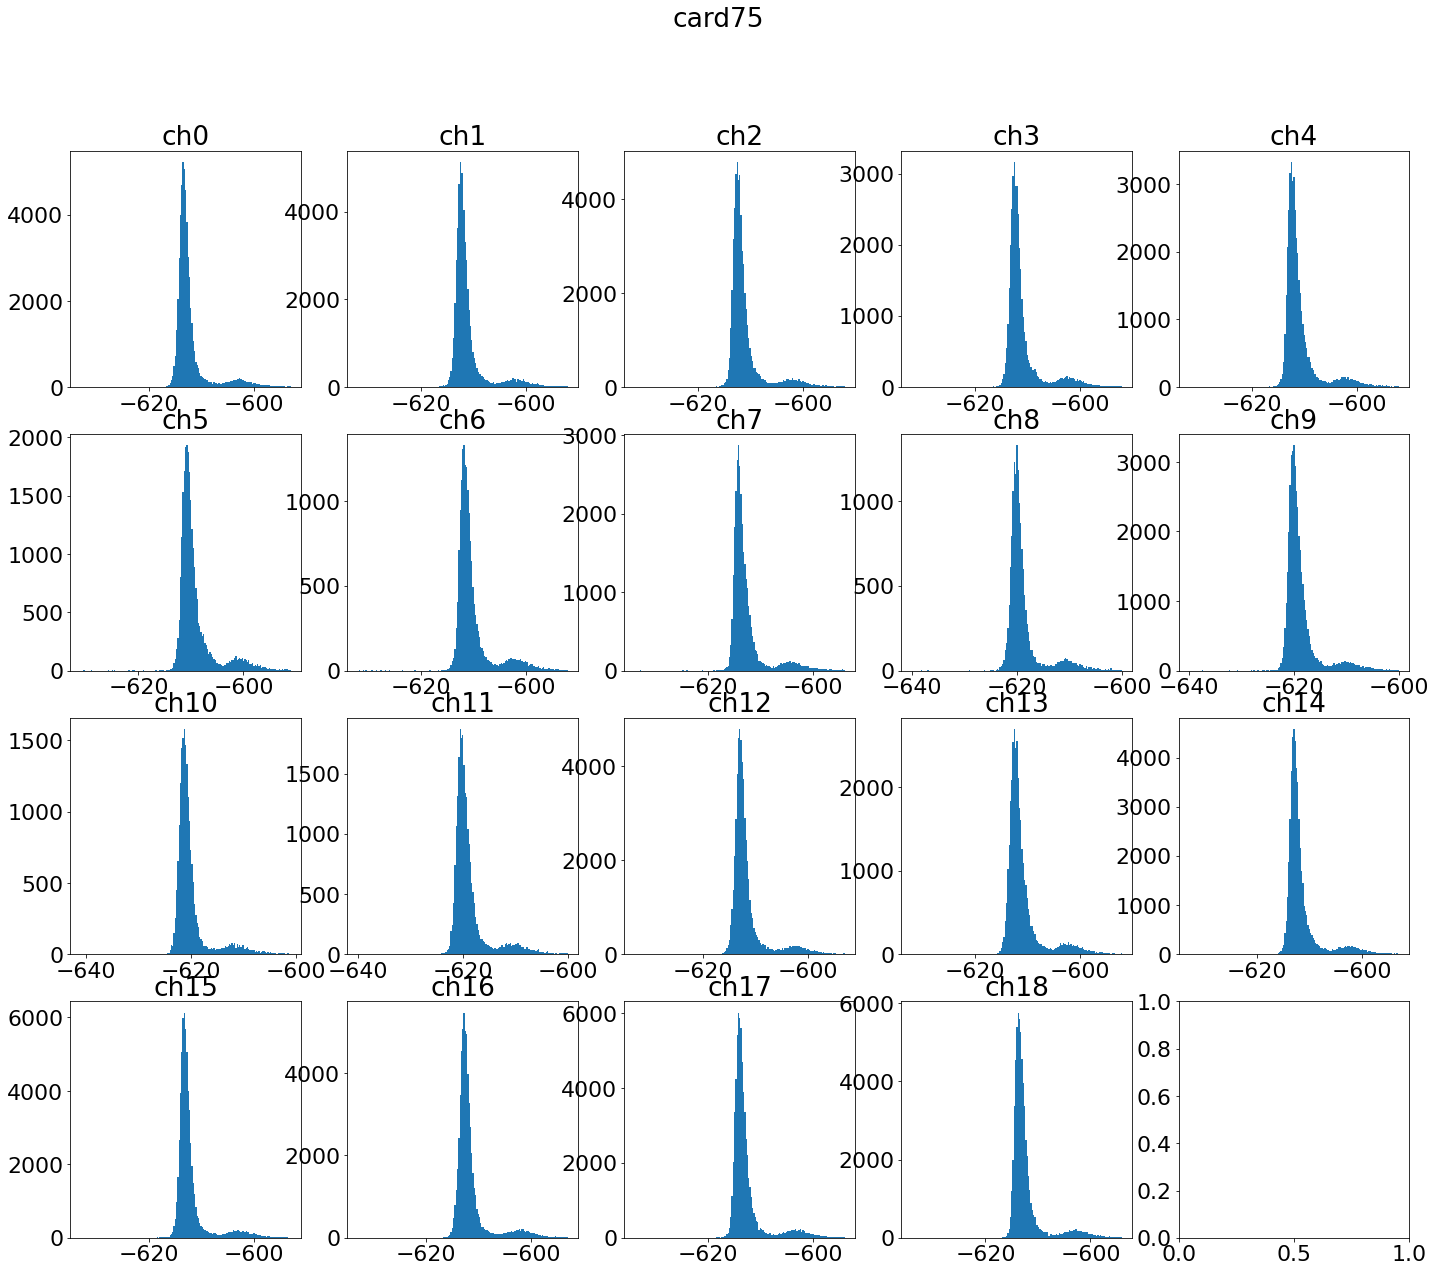

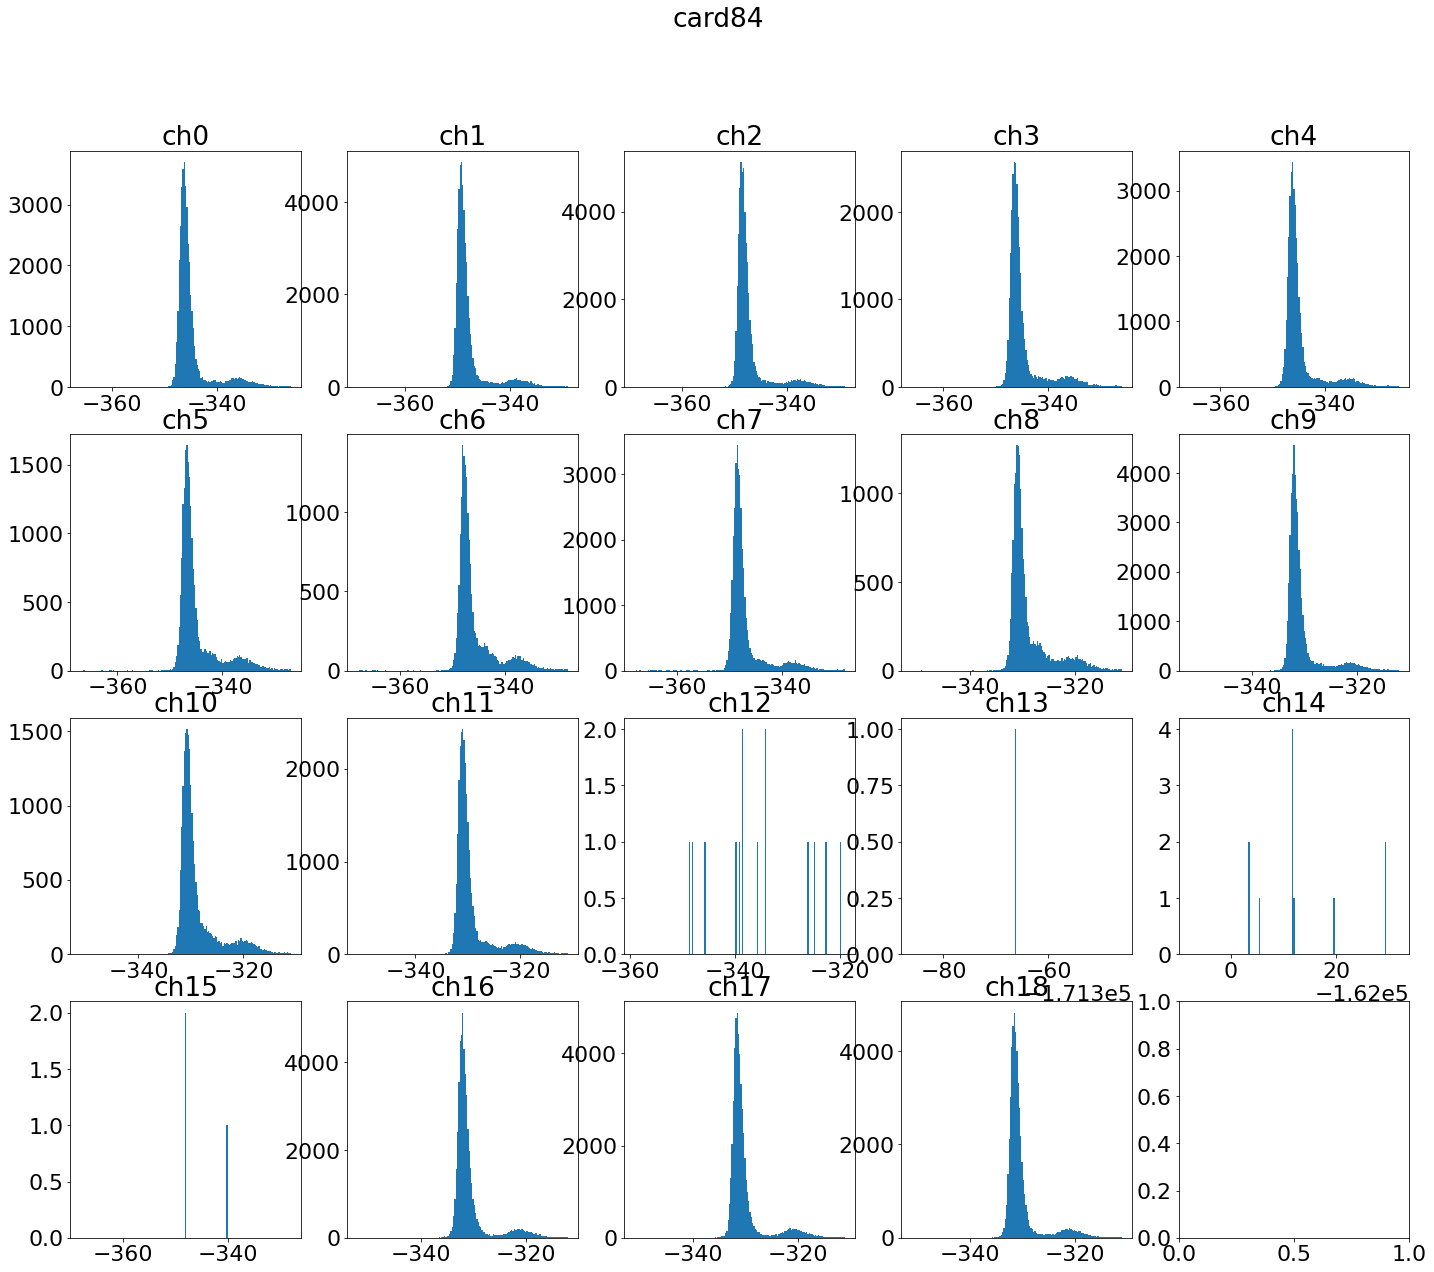

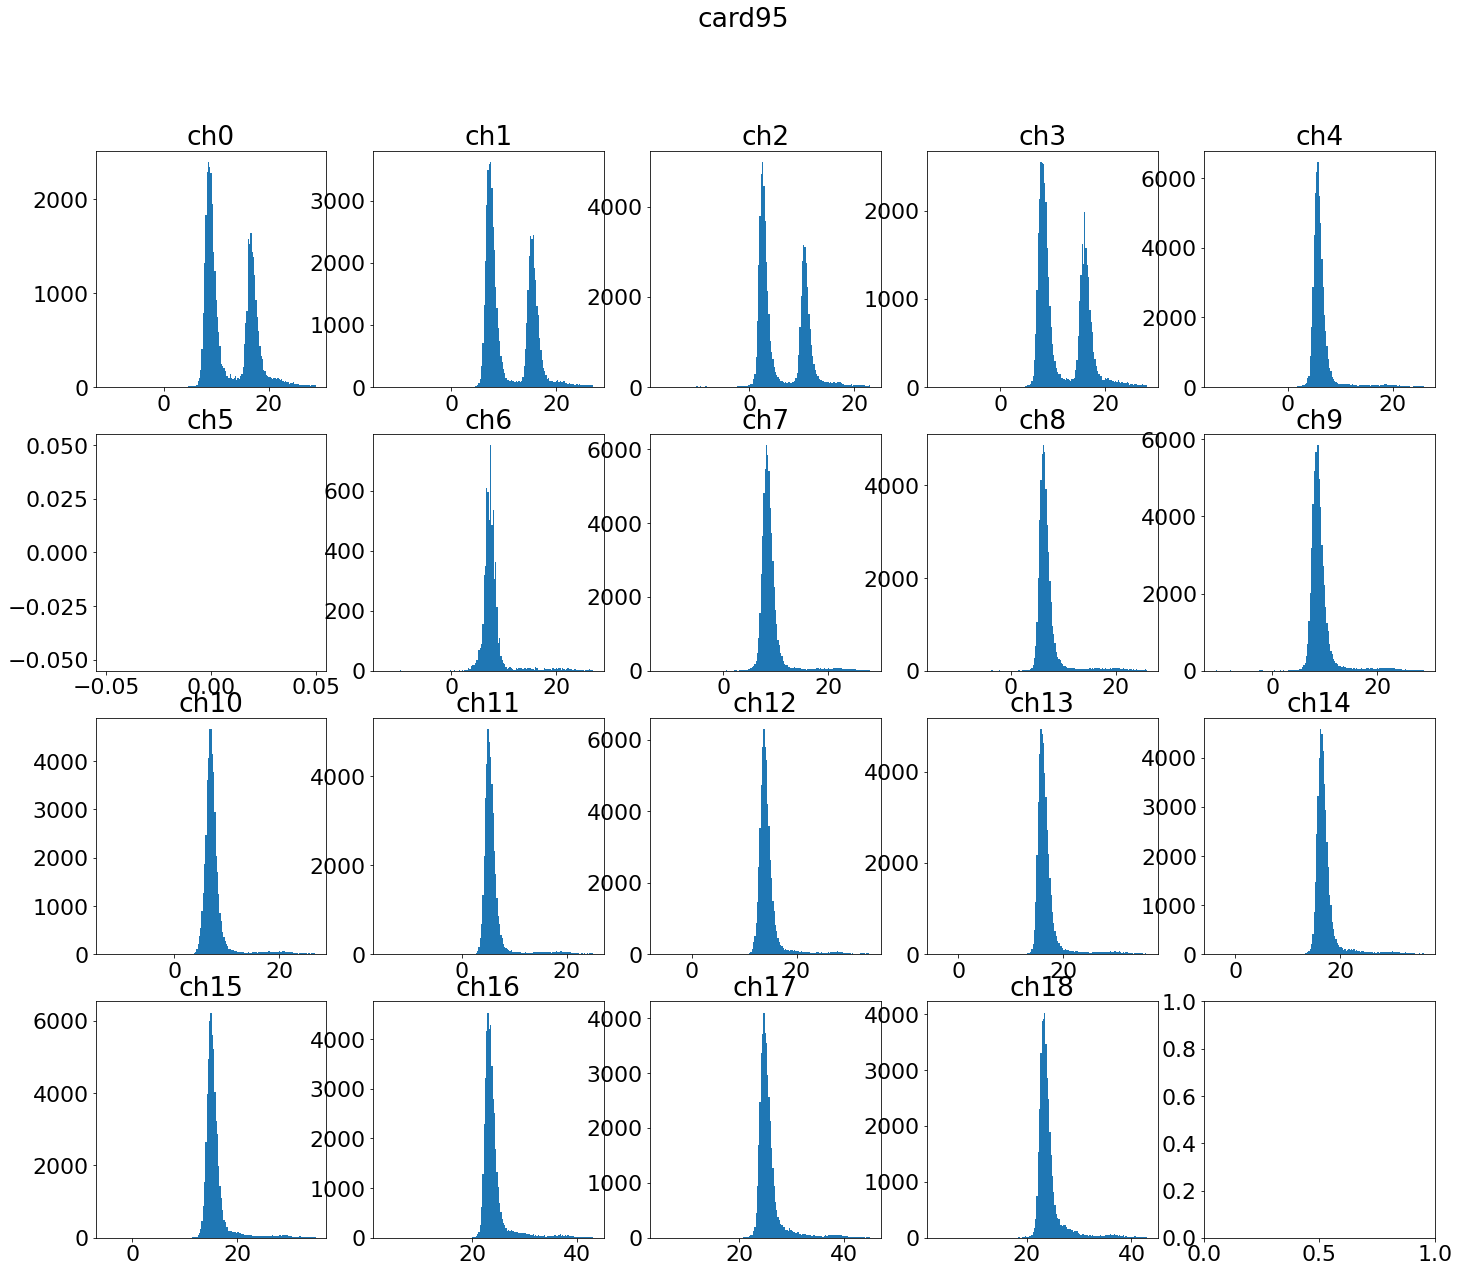

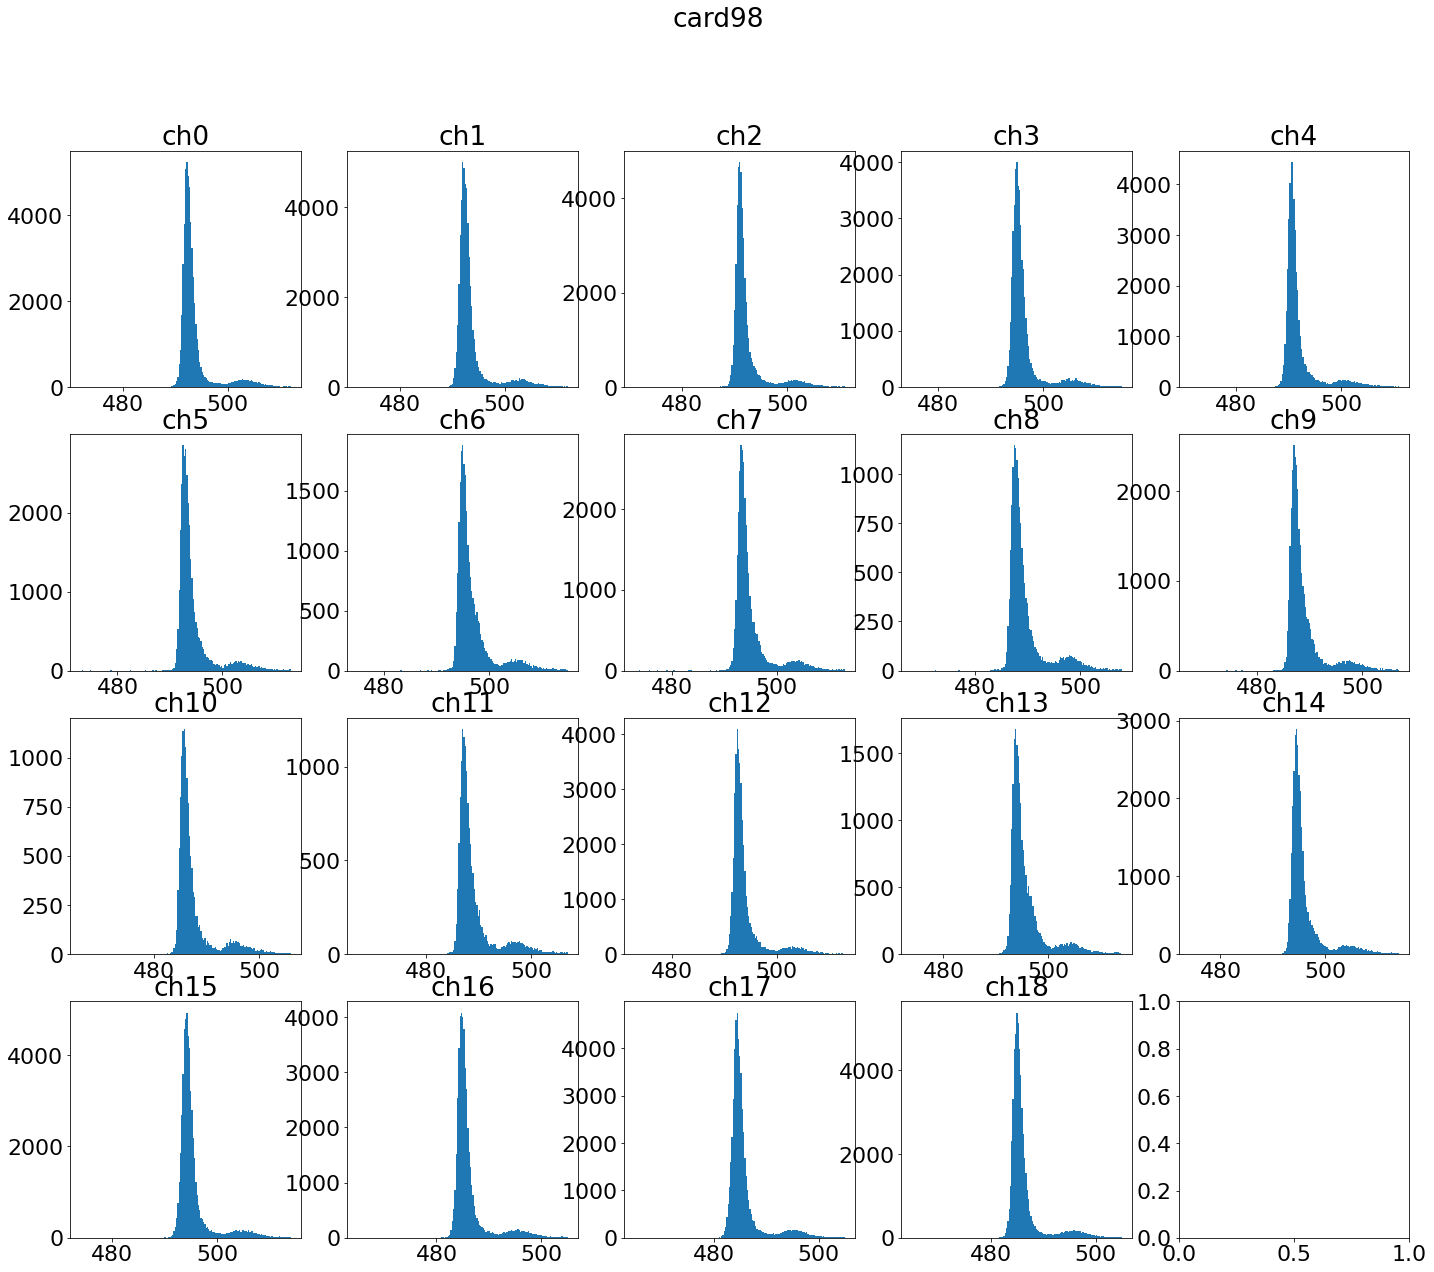

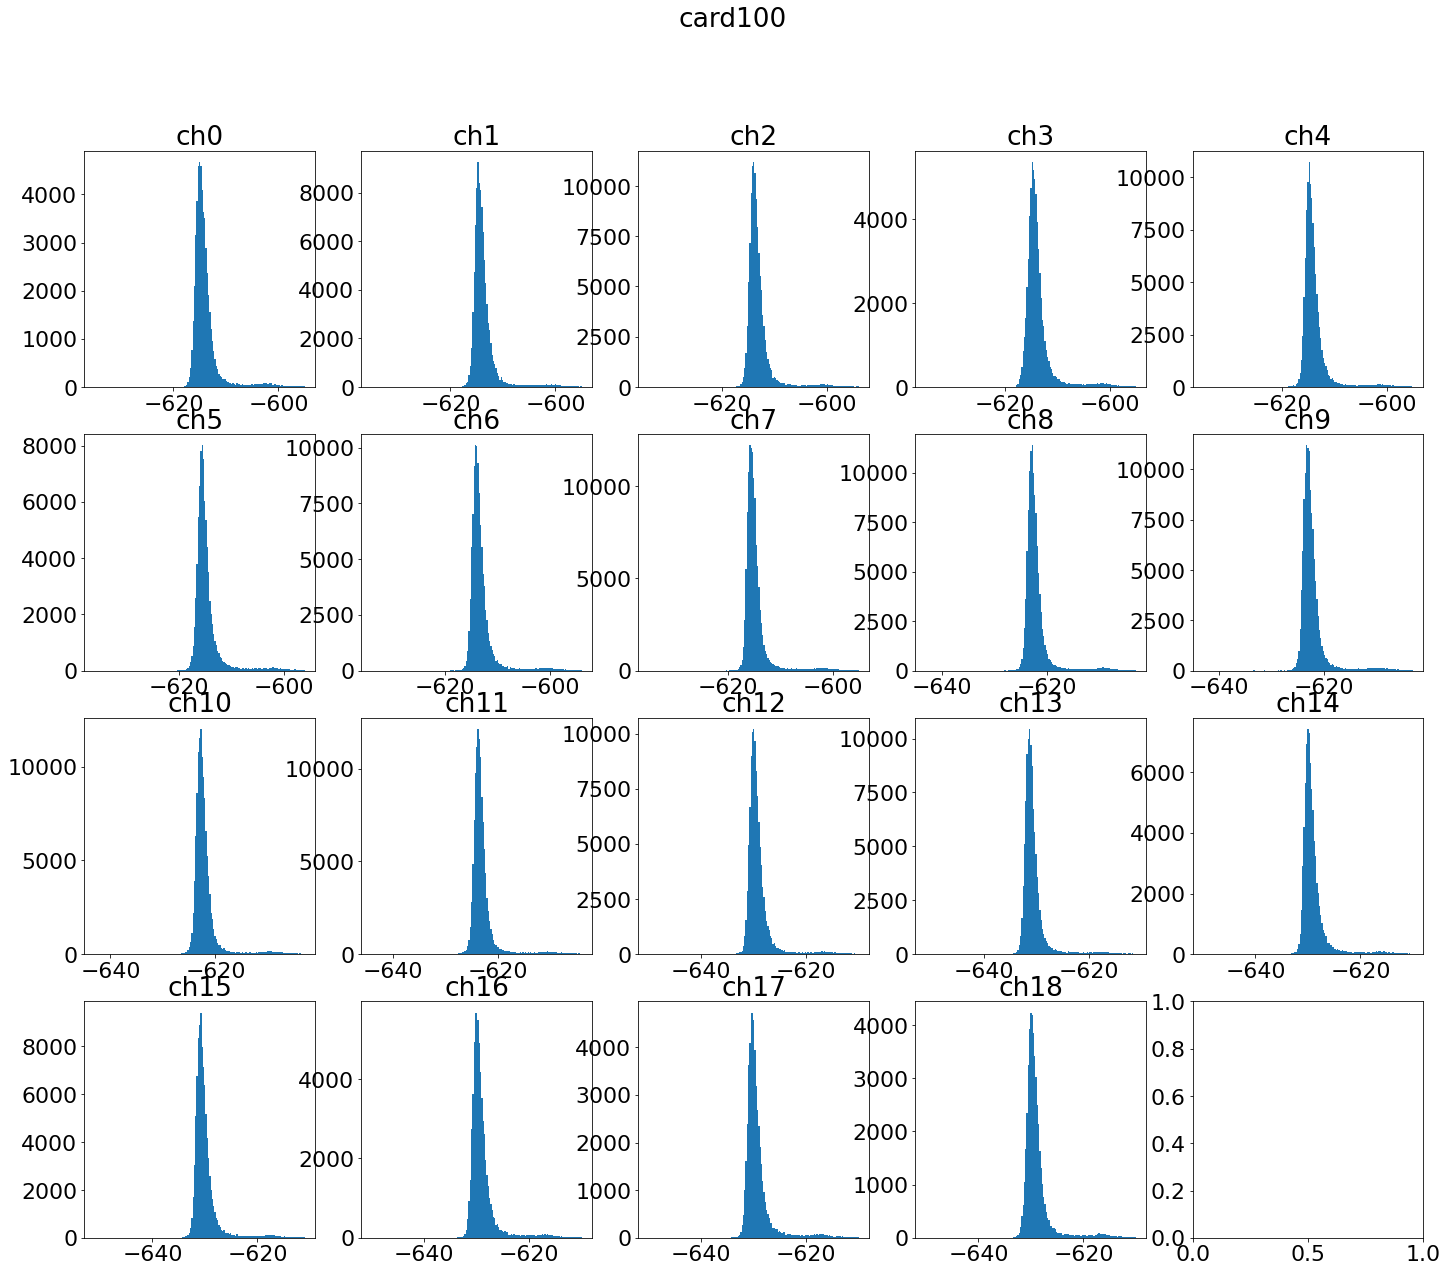

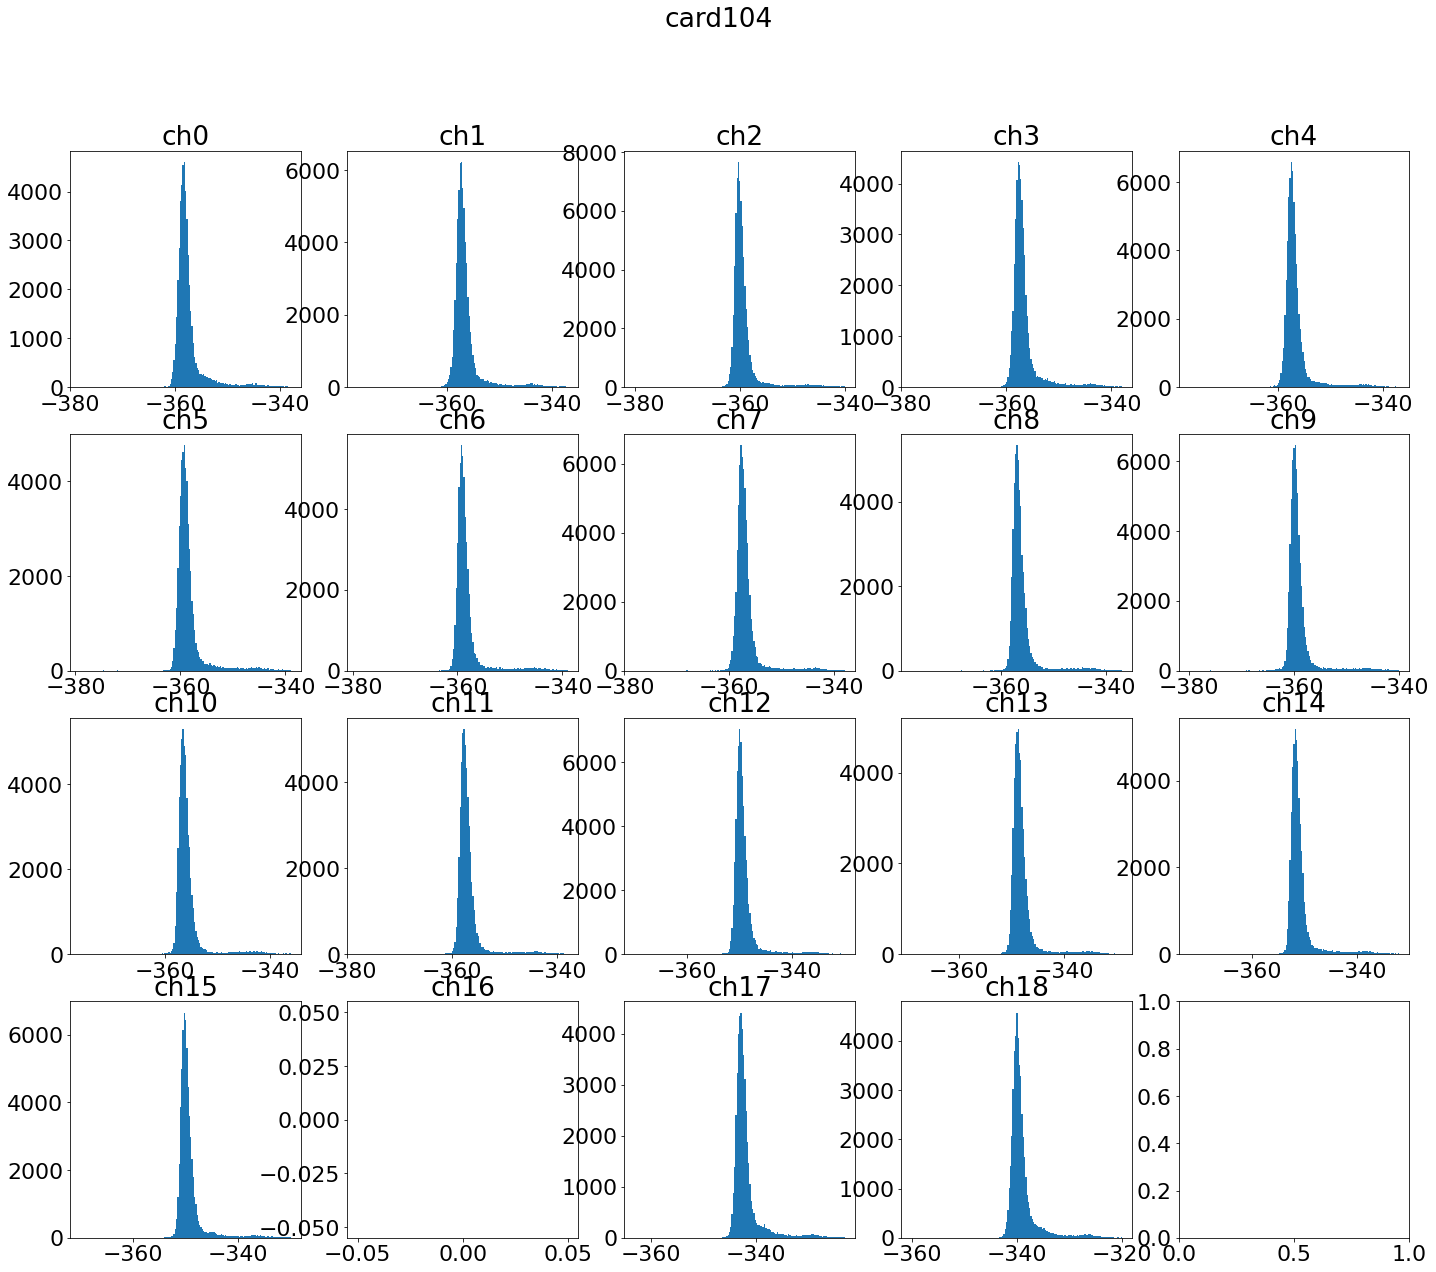

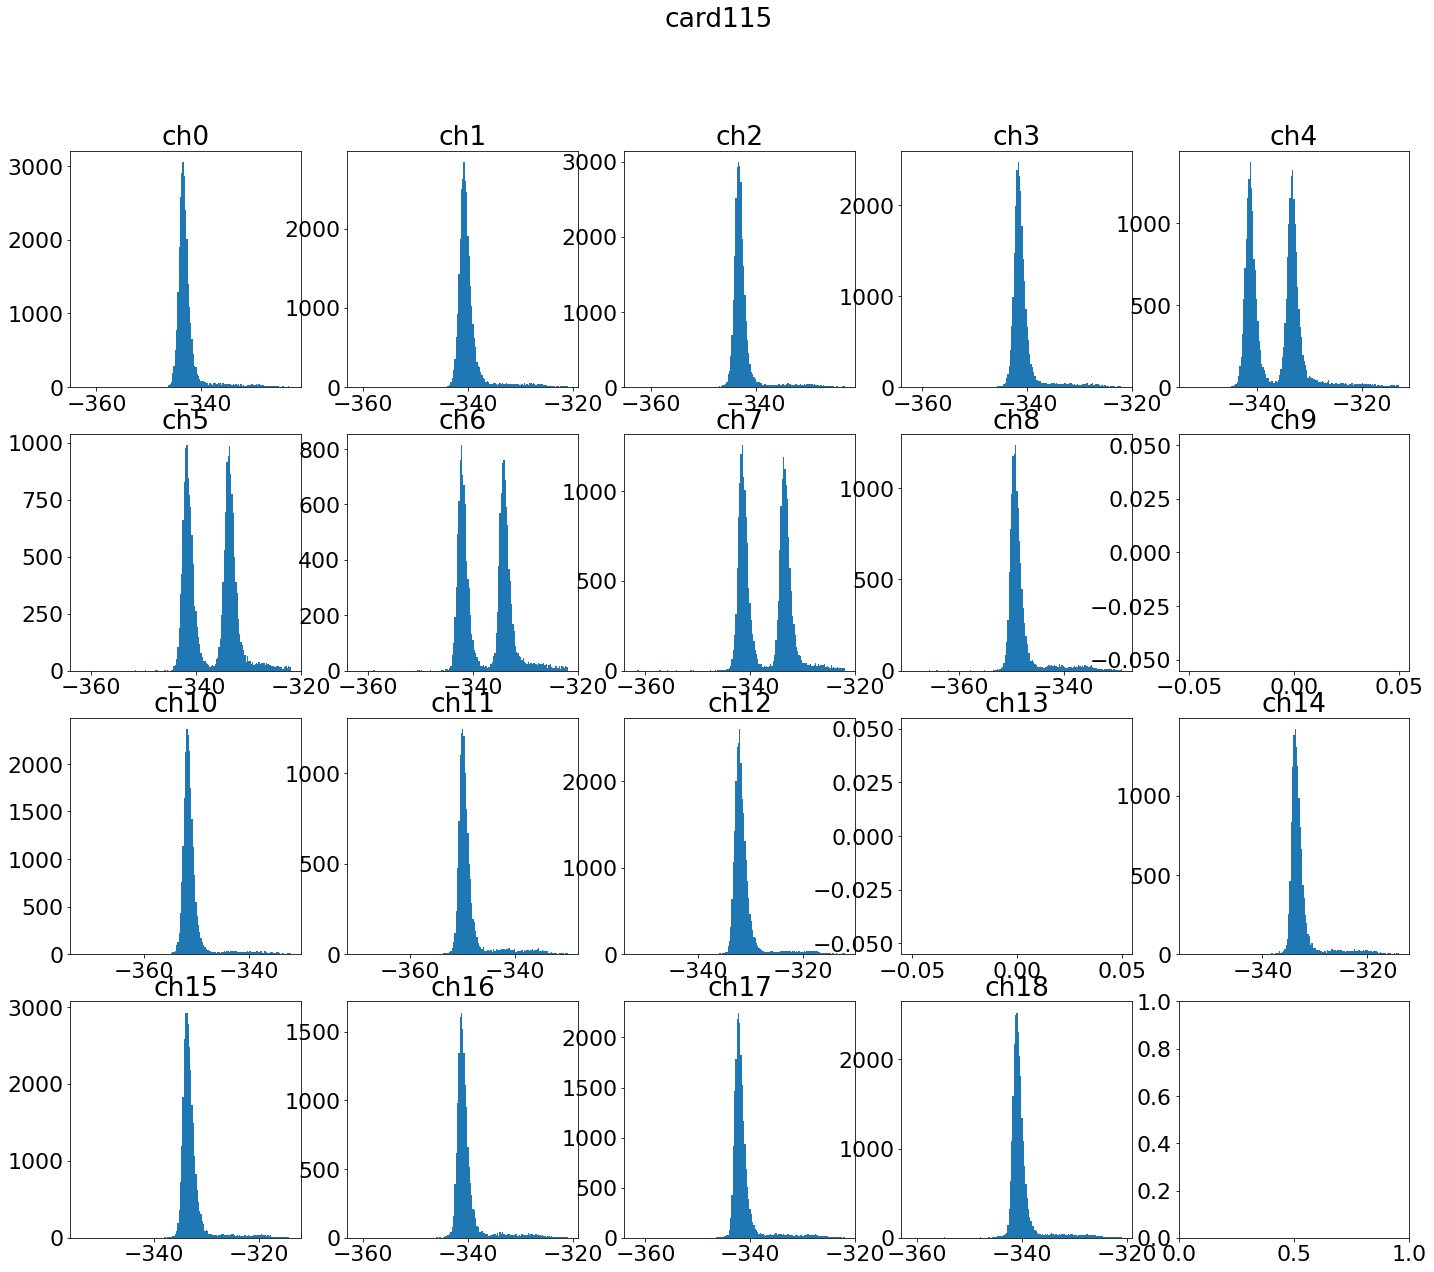

In [61]:
for c in good_cards:
    fig, ax = plt.subplots(4,5, figsize=(24,20))
    fig.suptitle(f"card{c}")
    for ch in range(19):
        this_pmt_times = times[(card_ids==c)&(channel_ids==ch)]%262144-52336-262144/2
        mode = stats.mode(np.rint(this_pmt_times))[0]
        ax[ch//5][ch%5].hist(this_pmt_times, bins=np.linspace(mode-20,mode+20,4*4+1))
        ax[ch//5][ch%5].set_title(f"ch{ch}")
#plt.yscale('log')

Text(0.5, 0, 'Non-integer part of hit time [ns]')

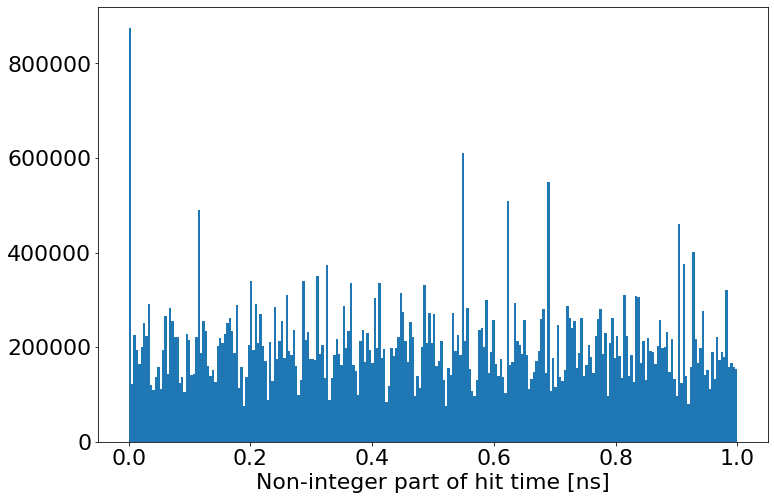

In [54]:
plt.hist(np.remainder(times[np.in1d(card_ids, good_cards)], 1), bins=256)
plt.xlabel("Non-integer part of hit time [ns]")

Text(0.5, 0, 'Hit time after coarse count [ns]')

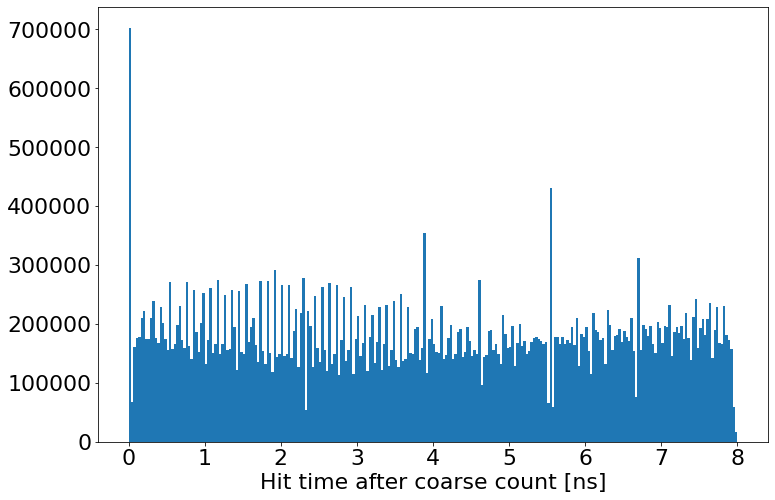

In [55]:
plt.hist(np.remainder(ak.flatten(hit_pmt_times[:50000]).to_numpy()[np.in1d(ak.flatten(hit_mpmt_card_ids[:50000]).to_numpy(), good_cards)], 8), bins=256)
plt.xlabel("Hit time after coarse count [ns]")

In [56]:
np.max(ak.flatten(hit_pmt_times[:50000]).to_numpy()[np.in1d(ak.flatten(hit_mpmt_card_ids[:50000]).to_numpy(), good_cards)])

10522922.01538086